# SYSC4906 Assignment 3
**File Name:** deployModel.ipynb

**Group Name:** 

**Student names:** Jonathan Arava, Brian Ranjan Philip

**Student numbers:**  101007533, 101018883


# Discussion of Solution
Your notebook must begin with **this** text cell containing a description of your solution. In this discussion, include links to any resources that you used in developing your solution. Use proper MarkDown syntax to format your discussion.**This description should be approximately 500 words in length and cover the following:**

1. Which machine learning approach did you use?
- We used a convolutional neural network to train our model and deploy it in this collab document. We used this approach since it is the most common way to train a classifier to determine specified objects. Since this problem can be solved using multiple learning algorithms, it was hard to pick the most likely to provide the best results and hence we used the most common approach to this problem.

2. How did you split your data between training and testing? 
_(e.g. hold-out test, cross-validation, repeated bootstrap samples, etc)_
- We split our data by first putting it into sets for each buildings (16 sets in total). We then split each. 
i.e. AA_train, AA_test = train_test_split(AA_set,train_size = 0.8, test_size =0.2). This gave us the path to each image for each building. We then used this to populate our TEST_DIR and TRAIN_DIR. We split the data into 80% of the images as our training set and the rest 20% was used as our test set. This was the recommended split [1].

3. How did you train your classifier?
If you used transfer learning, describe how you did so.
- We used transfer learning to train our classifier. First we used the model from Inception_v3. Then finetuned the model to only 16 classes (building).

4. How did you estimate your future performance _(worst recall, best precision, overall accuracy)_?
- WORST RECALL - the worst recall was determined by figuring out which building returned the highest fails when tested without test set. The way we choose to implement this logic was using a confusion matrix. We then extracted the details required to estimate the worst recall.
- BEST PRECISION - The best precision was found by the same method as worst recall. Instead of finding the building with most errors when testing with our test set, we simply found the least errors.
- OVERALL ACCURACY - This was achieved by passing the y_true and y_pred value through sklearn.metrics.accuracy_score to provide us with an accuracy for our trained model. This was executed on trainModel and hardcoded onto this document for testing purposes[2]

   **Here are our final predictions:**
   1. Building with worst recall: SA
   2. Building with best precision: MC
   3. Overall accuracy: 0.4479

5. Discuss the performance of your model. Which buildings did it do the best/worst on and why? What are the strengths and limitations of your method. 
- Our model had a low accuracy in identifying buildings. We modelled it using Inception_v3 which uses a 1000 different classes i.e. scarf, wig, etc. Our model was then trained to classify only 16 images. We used transfer learning from the model from inceptionv3 which was used to classify items such as a wig/ bag. It was not trained to classify building structures or details related to a building. Inception_v3 model did have a few building related features such as 'prison' and 'building arch' but the primary purpose of the base model was not  to distinguish buildings. The fact that we used inception_v3 and then did transfer learning using a subset of the images provided as our training data, helped us finetune the model to make it slightly more accurate to distinguish buildings. The building it did the best on is MC, and the worst was SA. The strength of our method is that our model is quite generalized. This is because the model was initially trained on 1000 different classes.

6. What would you have done differently if you had more time?
- If we had more time, we would probably test out different algorithms to see which one works best for our situation. Also, there are variations of CNN that could have had significant improvement on our performance and our accuracy. Some of the popular variations include R-FCN, R-CNN, Faster R-CNN might have positively improved our overall statistics [3]. 

#REFERENCES
[1]https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6
[2] https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
[3] https://medium.com/zylapp/review-of-deep-learning-algorithms-for-object-detection-c1f3d437b852


#Required functions to test your method
_These are the five required methods that you must implement._

## prepareModel()
This function should prepare your model for multiple invocations of classifyImage(fname). For example, this function could be used to load a pre-trained model from a URL, where that model is then used by  classifyImage(fname). You should use global variables for any variables initialized by this function.

Runtime of this method is **limited to 5 minutes**, so please don’t retrain your network here. All training should be captured in a pre-trained model to be loaded by this method.


In [0]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from keras.models import load_model

!wget https://github.com/jonathanarava/SYSC-4906/blob/master/Assignment%203/finetune_model1.zip?raw=true
!unzip finetune_model1.zip?raw=true

buildingCodes = ('AA', 'CB', 'CT', 'DT', 'FH', 'HP', 'HS', 'LB', 'MC', 'ME', 'ML', 'PA', 'RB', 'RO', 'SA', 'TB')

def prepareModel():
  global model # Sample global variable that you may populate here.

  model = load_model('finetune_model.h5')
  #model.summary()

prepareModel()


Using TensorFlow backend.


--2019-12-05 04:01:19--  https://github.com/jonathanarava/SYSC-4906/blob/master/Assignment%203/finetune_model1.zip?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/jonathanarava/SYSC-4906/raw/master/Assignment%203/finetune_model1.zip [following]
--2019-12-05 04:01:24--  https://github.com/jonathanarava/SYSC-4906/raw/master/Assignment%203/finetune_model1.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jonathanarava/SYSC-4906/master/Assignment%203/finetune_model1.zip [following]
--2019-12-05 04:01:24--  https://raw.githubusercontent.com/jonathanarava/SYSC-4906/master/Assignment%203/finetune_model1.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.

## label = classifyImage(fname)
Accepts a filename (e.g. ‘test/ME/testImage1.jpg’) of a square JPG image with size at least 500x500 pixels.
Returns a 2-character label corresponding to the predicted building (see table of labels above)

Any variables initialized by prepareModel() should be declared as global within this function if you want to access them (e.g. a pre-trained model)


In [0]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [0]:
def classifyImage(fname):
  img_width, img_height = 500, 500
  #train_datagen = 
  #ImageDataGenerator(preprocessing_function=preprocess_input, width_shift_range = 0.3, height_shift_range = 0.3, fill_mode ='nearest', horizontal_flip =True)
  img = image.load_img(fname, target_size=(img_width, img_height))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images)
  print("Predicting class of '{0:s}' using model '{1:s}'".format(fname,'Model'))
  print(buildingCodes[classes.argmax()])
  return buildingCodes[classes.argmax()] #Default behaviour to override

## label = worstRecall()
Returns the label of a building that you expect will have to lowest recall, when tested on new images

In [0]:
def worstRecall():
  return buildingCodes[14] #Default behaviour to override


## label = bestPrecision()
Returns the label of a building that you expect will have to highest precision, when tested on new images

In [0]:
def bestPrecision():
  return buildingCodes[8] #Default behaviour to override


##acc_score = estimatedAccuracy()
Returns the accuracy (between [0.0,1.0]) that you expect to achieve across all test images, assuming that each building is equally represented


In [0]:
# Function to return estimated accuracy that will be obtained across all test images

def estimatedAccuracy():
  return 0.4479

# Test required functions
_We will replace the text below with our actual test code..._

--2019-12-05 04:01:52--  https://github.com/jrgreen7/SYSC4906/blob/master/Assignments/Assignment3/Images/SampleImages.zip?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/jrgreen7/SYSC4906/raw/master/Assignments/Assignment3/Images/SampleImages.zip [following]
--2019-12-05 04:01:52--  https://github.com/jrgreen7/SYSC4906/raw/master/Assignments/Assignment3/Images/SampleImages.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jrgreen7/SYSC4906/master/Assignments/Assignment3/Images/SampleImages.zip [following]
--2019-12-05 04:01:52--  https://raw.githubusercontent.com/jrgreen7/SYSC4906/master/Assignments/Assignment3/Images/SampleImages.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.

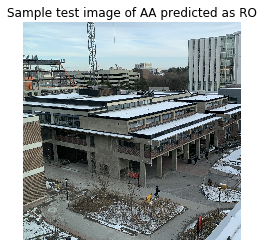

Incorrect...
Predicting class of 'SampleImages/CB_1.jpg' using model 'Model'
CB


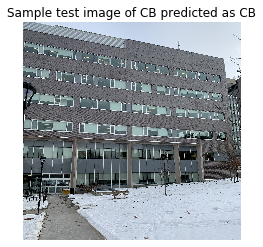

Correct!
Predicting class of 'SampleImages/DT_1.jpg' using model 'Model'
CB


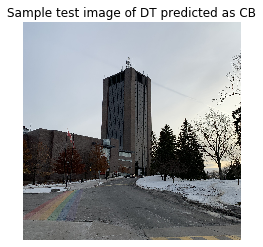

Incorrect...
Predicting class of 'SampleImages/HS_1.jpg' using model 'Model'
CB


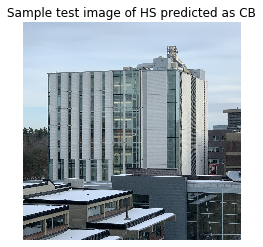

Incorrect...
Expected that worst recall would be on SA
Expected that best precision would be on MC
Expected total accuracy would be 0.448
Actual total accuracy is 0.250


In [0]:
import numpy as np
from PIL import Image, ExifTags
import matplotlib.pyplot as plt
from glob import glob


# First prepare the model:
prepareModel() # Limited to 5 minutes...

# Load (secret) test data into local Colab environment
!wget https://github.com/jrgreen7/SYSC4906/blob/master/Assignments/Assignment3/Images/SampleImages.zip?raw=true
!unzip SampleImages.zip?raw=true #Should create 4 images
test_images = sorted(glob('SampleImages/*.jpg'))
actual_labels = (buildingCodes[0],buildingCodes[1],buildingCodes[3],buildingCodes[6])

# Classify sample test images:
TP = 0
for imgFname,actual_label in (zip(test_images,actual_labels)):
  pred_label = classifyImage(imgFname) # Predict the label of this image file

  # Plot the image with actual and predicted labels
  # Note that we may have to rotate the image, depending on the 
  # orientation of the camera. Use EXIF tags for this:
  im = Image.open(imgFname)
  for orientation in ExifTags.TAGS.keys() : 
    if ExifTags.TAGS[orientation]=='Orientation' : break 
  exif=dict(im._getexif().items())

  if exif[orientation] == 3 : 
    im=im.rotate(180, expand=True)
  elif exif[orientation] == 6 : 
    im=im.rotate(270, expand=True)
  elif exif[orientation] == 8 : 
    im=im.rotate(90, expand=True)

  im = im.convert('RGB') # May not be necessary?

  plt.title("Sample test image of {0:s} predicted as {1:s}".format(actual_label, pred_label))
  plt.imshow(np.asarray(im))
  plt.axis('off')
  plt.show()

  if (pred_label==actual_label):
    print('Correct!')
    TP += 1
  else:
    print("Incorrect...")

# Print the predicted performance:
print("Expected that worst recall would be on {0:s}".format(worstRecall()))
print("Expected that best precision would be on {0:s}".format(bestPrecision()))
print("Expected total accuracy would be {0:.3f}".format(estimatedAccuracy()))
print("Actual total accuracy is {0:.3f}".format((TP)/(len(test_images))))
